## Ploting regression residuals

In [80]:
library(broom)
library(ggplot2)
library(openintro)

In [81]:
head(mammals)

species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger,log.brain,log.body
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
Africanelephant,6654.000,5712.0,NA,NA,3.3,38.6,645,3,5,3,8.650325,8.80297346
Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42,3,1,3,1.887070,0.00000000
ArcticFox,3.385,44.5,NA,NA,12.5,14.0,60,1,1,1,3.795489,1.21935391
Arcticgroundsquirrel,0.920,5.7,NA,NA,16.5,NA,25,5,2,3,1.740466,-0.08338161
Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624,3,5,4,8.434464,7.84267147
Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180,4,4,4,5.190175,2.35612586


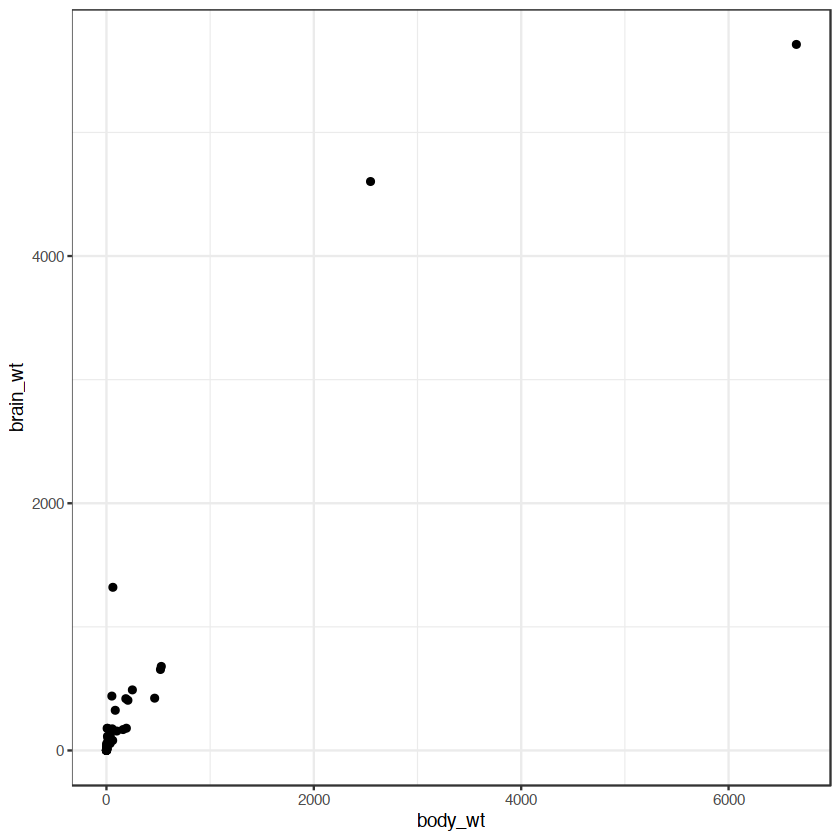

In [82]:
ggplot(mammals, aes(x = body_wt, y = brain_wt))+
  geom_point()+theme_bw()

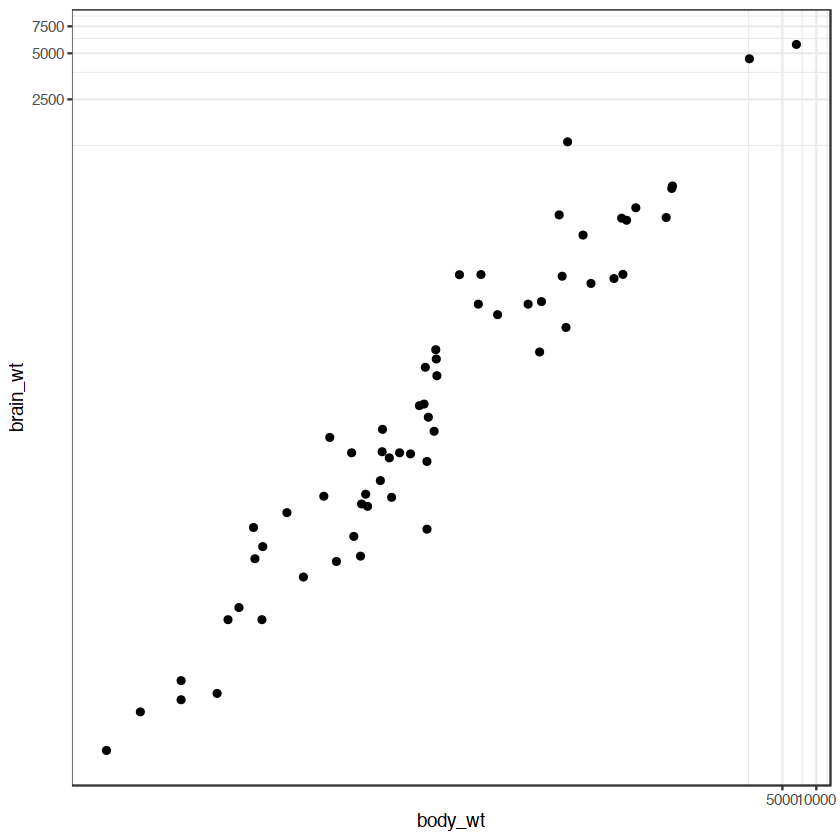

In [83]:
ggplot(mammals, aes(x = body_wt, y = brain_wt))+
  geom_point()+theme_bw()+ coord_trans(x = "log10", y = "log10")

In [84]:
mammals$log.brain<-log(mammals$brain_wt)
mammals$log.body<-log(mammals$body_wt)

In [85]:
head(mammals)

species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger,log.brain,log.body
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
Africanelephant,6654.000,5712.0,NA,NA,3.3,38.6,645,3,5,3,8.650325,8.80297346
Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42,3,1,3,1.887070,0.00000000
ArcticFox,3.385,44.5,NA,NA,12.5,14.0,60,1,1,1,3.795489,1.21935391
Arcticgroundsquirrel,0.920,5.7,NA,NA,16.5,NA,25,5,2,3,1.740466,-0.08338161
Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624,3,5,4,8.434464,7.84267147
Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180,4,4,4,5.190175,2.35612586


In [86]:
mod<-lm(log.brain~log.body,data=mammals)

In [87]:
d<-augment(mod)

In [88]:
head(d)

log.brain,log.body,.fitted,.resid,.std.resid,.hat,.sigma,.cooksd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.650325,8.80297346,8.751860,-0.1015355,-0.1549994,0.10979911,0.7000137,0.001481634
1.887070,0.00000000,2.134789,-0.2477190,-0.3602559,0.01913583,0.6993962,0.001265991
3.795489,1.21935391,3.051360,0.7441293,1.0805395,0.01615251,0.6933081,0.009584369
1.740466,-0.08338161,2.072112,-0.3316457,-0.4824049,0.01952240,0.6987947,0.002316801
8.434464,7.84267147,8.030015,0.4044490,0.6097393,0.08725087,0.6979813,0.017769563
5.190175,2.35612586,3.905855,1.2843199,1.8665751,0.01787279,0.6795215,0.031701922


`geom_smooth()` using formula 'y ~ x'



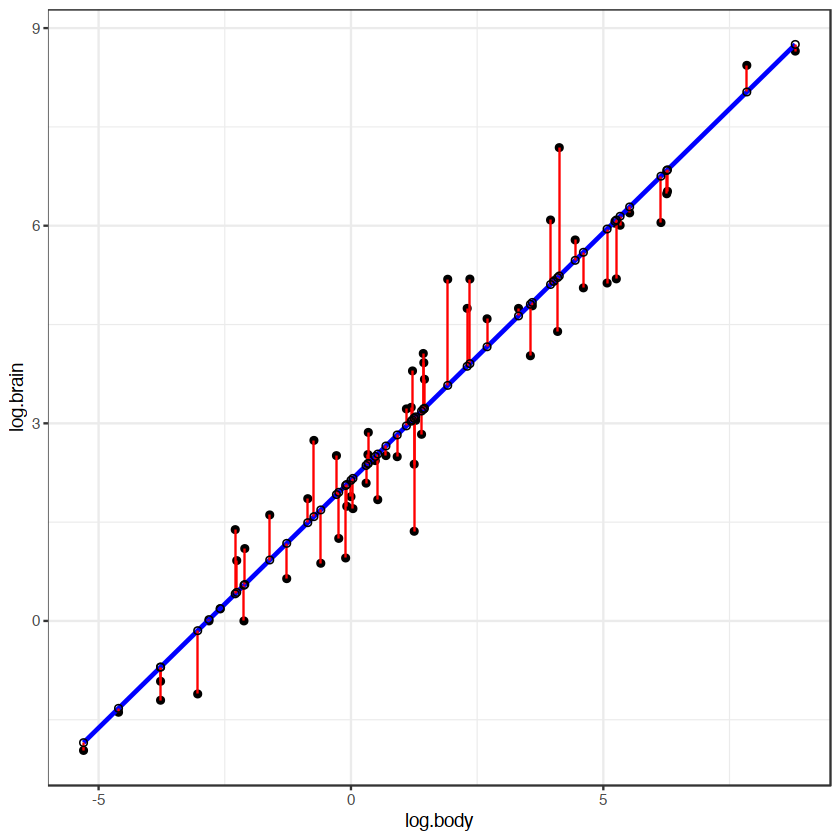

In [100]:
a<-ggplot(d,aes(x=log.body,y=log.brain))+geom_point()+
       geom_smooth(method = "lm", se = FALSE, color = "blue")+
  geom_segment(aes(xend =log.body, yend = .fitted),color="red")+
  geom_point(aes(y = .fitted), shape = 1)+theme_bw()
a

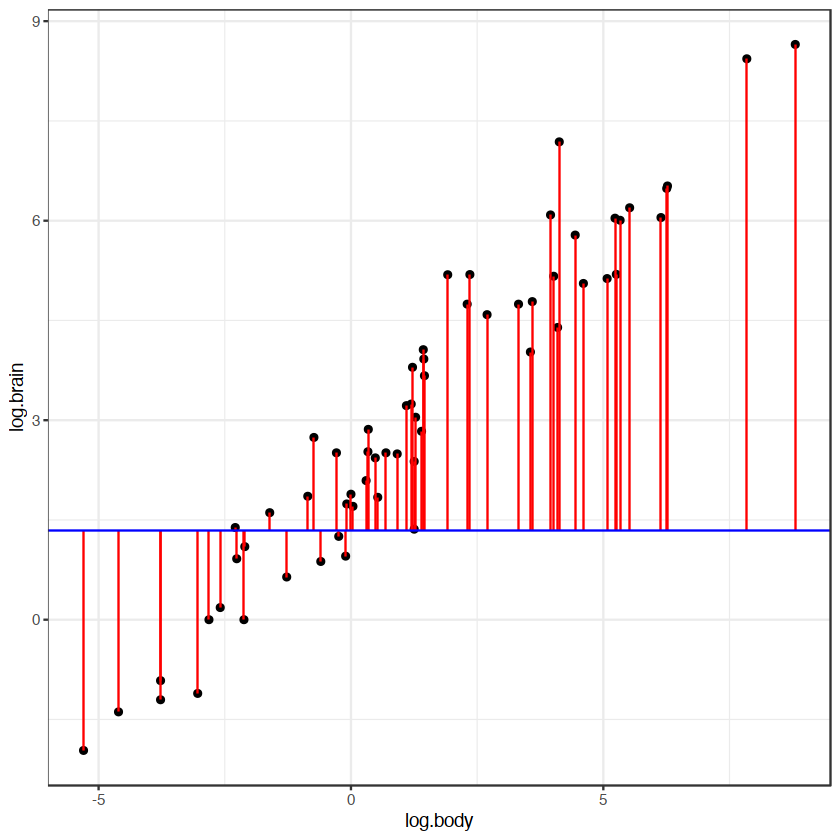

In [101]:
b<-ggplot(d,aes(x=log.body,y=log.brain))+geom_point()+
  geom_segment(aes(xend =log.body, yend = mean(log.body)),color="red")+ 
geom_hline(yintercept=mean(d$log.body),color = "blue")+theme_bw()
b

In [95]:
library(gridExtra)

`geom_smooth()` using formula 'y ~ x'



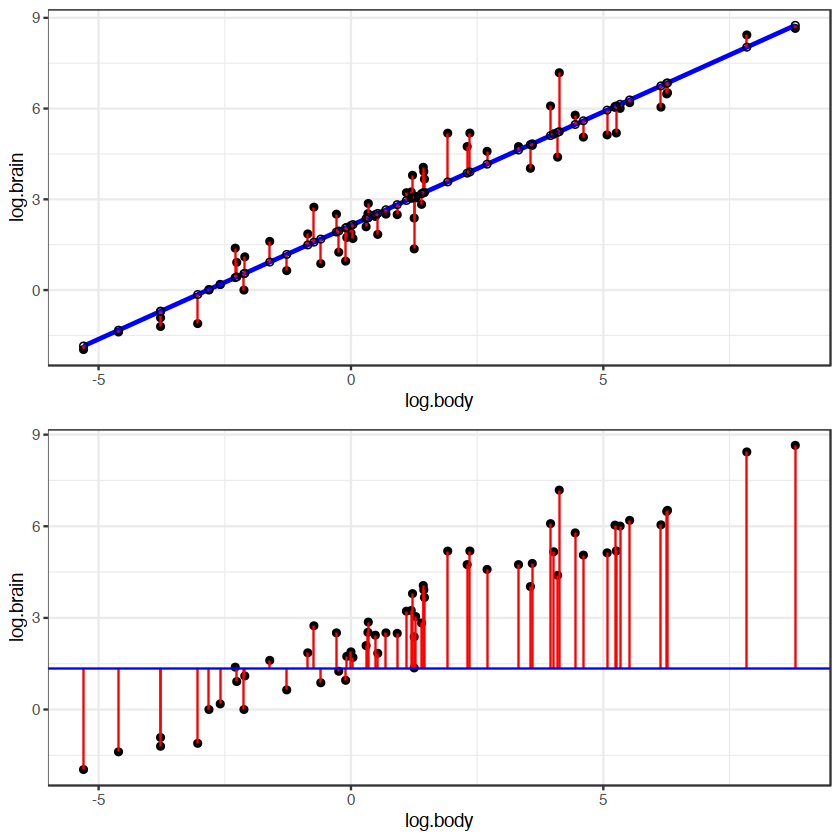

In [102]:
grid.arrange(a, b, 
             ncol = 1, nrow = 2)